# ECSE415 - Into to Computer Vision
## Assignment 3
### Alexander Harris - 260688155

## 1 - Segmentation
### 1.1 - K-means clustering and Expectation Maximization

In [16]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

img = cv2.imread('./home.jpg')
img_arr = np.array(img, dtype=np.float64)

In [30]:
# Implement K-means clustering using numpy lib. Use K=2, K=3. Display segmented image for 10 iterations.
def kMeansCluster(arr, k, maxIters=10):
    h, w, d = arr.shape
    
    # Init cluster centers
    centers = np.random.random_sample((k, d)) * np.max(arr)
    
    for i in range(maxIters):
        # Find distances and compute clusters
        distances = np.array([arr - c for c in centers])
        distances = np.linalg.norm(distances, axis=-1)
        clusters = np.argmin(distances, axis=0)
        
        # Compute new cluster centers
        new_centers = np.zeros(shape=(k, d))
        for c in range(k):
            new_centers[c] = np.mean(arr[clusters == c], axis=0)
        centers = new_centers
        
        plt.figure(figsize=(5,5))
        plt.title('KMeans Clustering - K=%d, Iteration: %d/%d' % (k, i+1, maxIters))
        plt.axis('off')
        plt.imshow(clusters.astype(np.uint8))
    plt.show()

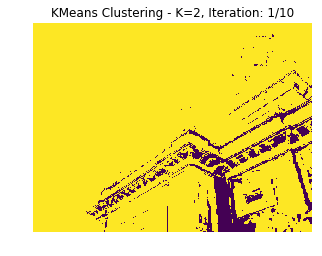

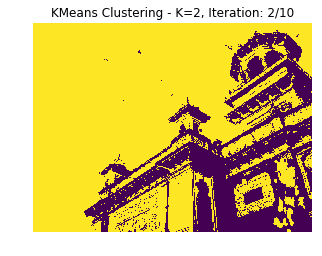

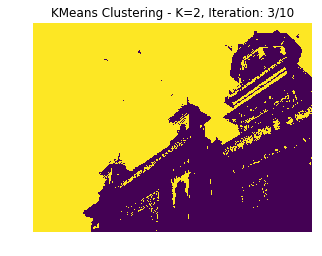

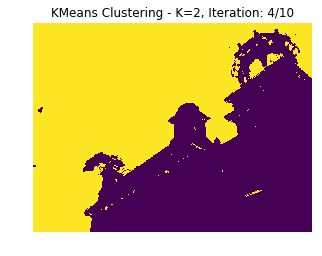

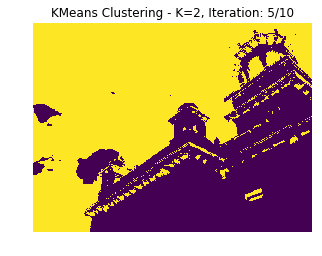

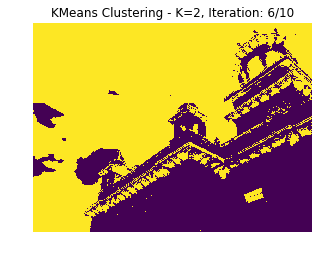

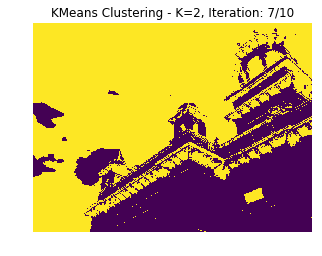

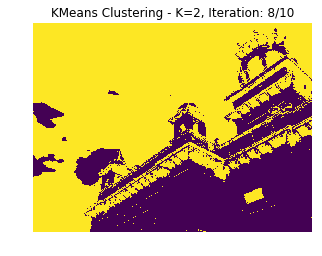

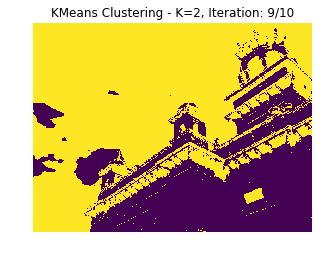

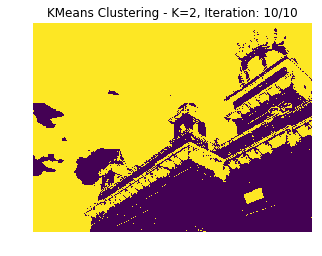

In [31]:
kMeansCluster(img_arr, 2)

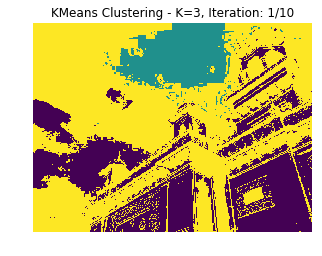

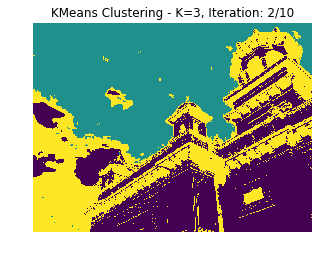

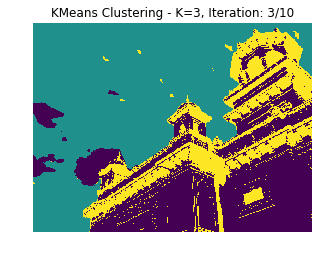

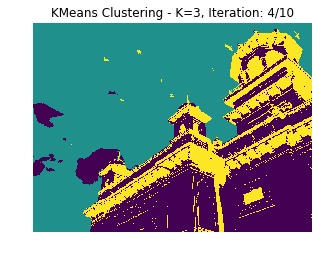

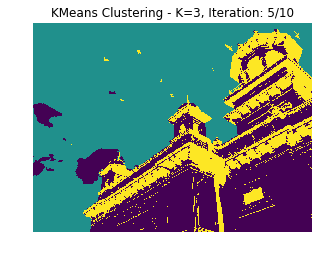

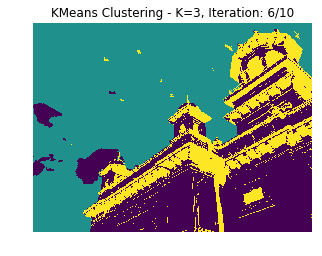

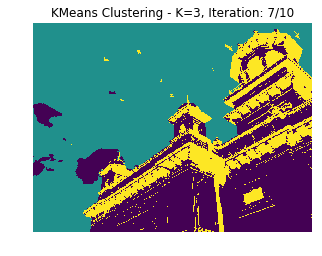

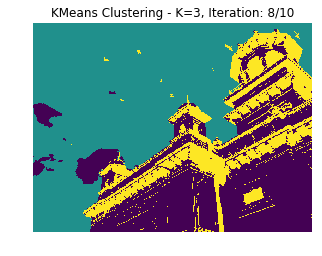

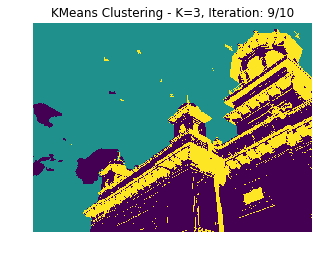

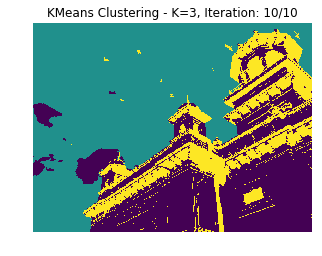

In [32]:
kMeansCluster(img_arr, 3)

In [33]:
def expectationMax(arr, k, maxIters):
    h, w, d = arr.shape
    